# Housing Trends in Philadelphia, PA

## Home values and rental prices across Pennsylvania cities (Arame)

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from scipy.stats import linregress
from pprint import pprint
from pathlib import Path
import numpy as np
import requests
import time
import scipy.stats as st
import json
import geopandas
import fiona

In [202]:
# Files to Load
all_cities = Path("Resources/All cities.csv")
rental_cities = Path("Resources/cities_Rental.csv")
# Read Home Values and Rentals data files and store into Pandas DataFrames
all_cities_df = pd.read_csv(all_cities)
rental_cities_df = pd.read_csv(rental_cities)

In [203]:
#preview data
all_cities_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,138087.469720,138828.247941,...,678175.116018,675108.425157,670335.064574,667203.689604,667148.751008,671701.027309,679600.376717,690959.383186,704342.726905,716119.744242
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212044.687069,212344.459410,...,931491.119625,929018.197384,925594.360838,916951.272431,904274.380887,893082.241345,887530.880178,888663.280132,895330.900228,907873.758314
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,97478.767088,97452.674773,...,264752.377937,264739.315272,263990.770331,262548.531899,260998.287322,260279.292176,260087.150427,260353.666964,260986.929118,261794.136337
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,123765.078771,123799.663513,...,284152.304924,283158.547634,282128.814610,283252.429431,284524.509604,286241.797907,286697.200459,287480.613293,289254.971275,291186.232497
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,97121.681072,97212.780959,...,266647.479284,266099.053521,264956.007084,263802.084030,262841.091415,263019.472933,263033.353807,263188.217219,263401.654053,263746.818220


In [204]:
# narraw down dataframe to state = PA
# Narrow down dataframe to city = Philadelphia
PA_home_values_df= all_cities_df.loc[all_cities_df["State"]=="PA",:]
philadelphia_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Philadelphia",:]
# reduce date to 2016-2022
philadelphia_home_values_df = philadelphia_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
philadelphia_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,132502.128453,147876.582086,161746.951605,177871.040393,196551.950389,205065.480623,221780.138526


In [205]:
# Narrow down dataframe to city = Pittsburgh
Pittsburgh_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Pittsburgh",:]
# reduce date to 2016-2022
Pittsburgh_home_values_df = Pittsburgh_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Pittsburgh_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
31,26529,city,Pittsburgh,PA,Allegheny County,136392.391395,149388.279342,165475.841044,174658.731056,198284.149671,215339.859861,228477.681209


In [206]:
# Narrow down dataframe to city = Allentown
Allentown_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Allentown",:]
# reduce date to 2016-2022
Allentown_home_values_df = Allentown_home_values[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Allentown_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
199,16726,city,Allentown,PA,Lehigh County,143404.999572,155922.368196,174485.456411,185522.709566,206670.804623,232649.35404,255485.861097


In [207]:
# Narrow down dataframe to city = Erie
Erie_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Erie",:]
# reduce date to 2016-2022
Erie_home_values_df = Erie_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Erie_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
194,11335,city,Erie,PA,Erie County,110468.850906,114128.28587,114141.107089,119285.333525,131714.315921,146265.776953,160337.832062


In [208]:
#Combine the data into a single dataset
all_cities_complete = pd.concat([philadelphia_home_values_df,Pittsburgh_home_values_df,Allentown_home_values_df,Erie_home_values_df])
all_cities_complete

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,132502.128453,147876.582086,161746.951605,177871.040393,196551.950389,205065.480623,221780.138526
31,26529,city,Pittsburgh,PA,Allegheny County,136392.391395,149388.279342,165475.841044,174658.731056,198284.149671,215339.859861,228477.681209
199,16726,city,Allentown,PA,Lehigh County,143404.999572,155922.368196,174485.456411,185522.709566,206670.804623,232649.354040,255485.861097
194,11335,city,Erie,PA,Erie County,110468.850906,114128.285870,114141.107089,119285.333525,131714.315921,146265.776953,160337.832062


In [209]:
#Calculate % change in home values from Dec 2016 to Dec 2022
homevalue_change_phl = (philadelphia_home_values_df["2022-12-31"] - philadelphia_home_values_df["2016-12-31"])/philadelphia_home_values_df["2016-12-31"] * 100
homevalue_change_pitts = (Pittsburgh_home_values_df["2022-12-31"] - Pittsburgh_home_values_df["2016-12-31"])/Pittsburgh_home_values_df["2016-12-31"] * 100
homevalue_change_ALL = (Allentown_home_values_df["2022-12-31"] - Allentown_home_values_df["2016-12-31"])/Allentown_home_values_df["2016-12-31"] * 100
homevalue_change_Erie = (Erie_home_values_df["2022-12-31"] - Erie_home_values_df["2016-12-31"])/Erie_home_values_df["2016-12-31"] * 100
columns_name =["RegionName","Percent Change 2015 to 2022"]
all_change=pd.concat([homevalue_change_phl,homevalue_change_pitts,homevalue_change_ALL,homevalue_change_Erie,])
all_change
all_change_df= pd.DataFrame({
     "Cities":["Philadelphia","Pittsburgh","Allentown","Erie"],
      "Percent Change":["67%","67%","78%","45%"]
})
                        
all_change_df

,Cities,Percent Change
0,Philadelphia,67%
1,Pittsburgh,67%
2,Allentown,78%
3,Erie,45%


Text(0, 0.5, 'Percent Change')

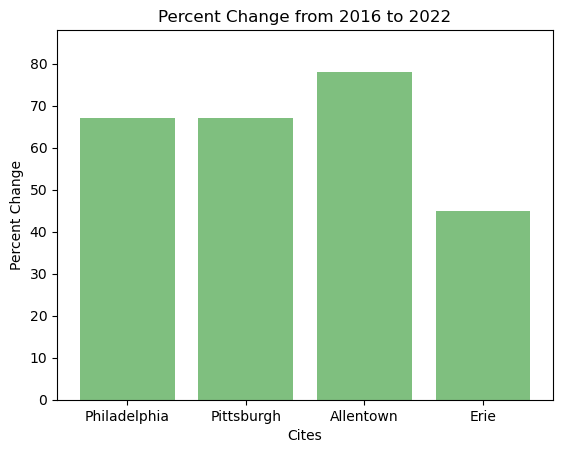

In [210]:
#Bar graph 
percent = [67, 67, 78, 45, ]
x_axis = ["Philadelphia","Pittsburgh","Allentown","Erie"]
plt.bar(x_axis, percent, color='g', alpha=0.5,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Philadelphia", "Pittsburgh", "Allentown", "Erie",])
plt.ylim(0, max(percent)+10)
plt.title("Percent Change from 2016 to 2022")
plt.xlabel("Cites")
plt.ylabel("Percent Change")

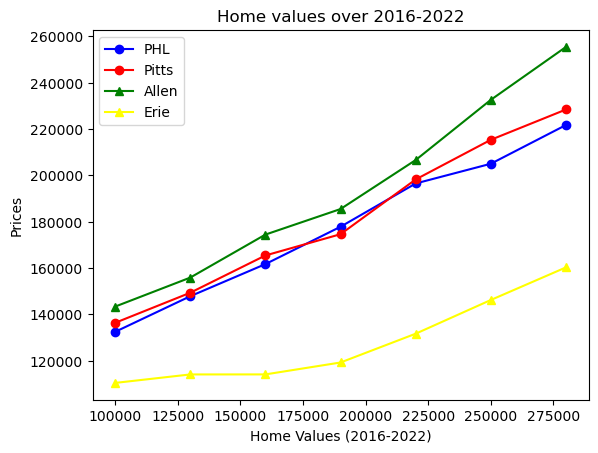

In [211]:
#create Line graph
x_axis = np.arange(100000, 300000, 30000)
phl= [132502,147876,161746,177871,196551,205065,221780] 
pitts=[136392,149388,165475,174658,198284,215399,228477]
allen=[143404,155922,174485,185522,206670,232649,255485]
erie=[110468,114128,114141,119285,131714,146265,160337]
plt.plot(x_axis, phl,marker ='o', color='blue', label="PHL")
plt.plot(x_axis, pitts, marker ='o', color='red', label="Pitts")
plt.plot(x_axis, allen, marker ='^', color='Green', label="Allen")
plt.plot(x_axis, erie,marker ='^', color='Yellow', label="Erie")
plt.xlabel("Home Values (2016-2022)")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.title("Home values over 2016-2022")
plt.show()

In [212]:
#preview data
rental_cities_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2822.651771,2840.337155,...,3629.108860,3635.667432,3647.094597,3660.456743,3676.040047,3688.648459,3699.287512,3704.075776,3701.271206,3693.215524
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1948.241342,1959.798723,...,2904.757088,2911.829735,2918.057017,2922.805299,2930.923614,2937.166224,2943.588446,2938.673698,2933.895196,2925.013007
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1271.182161,1274.668263,...,1584.469389,1591.142831,1599.564579,1608.211669,1616.043944,1621.102095,1624.224636,1625.816795,1626.102862,1626.255419
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1600.671700,1602.178947,...,2027.767882,2042.907113,2055.159040,2066.529459,2075.515550,2081.769357,2085.289595,2091.504739,2099.842227,2106.287234
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1059.022244,1062.007188,...,1516.294124,1521.402659,1526.433552,1534.140682,1537.605416,1542.038267,1539.312966,1535.526893,1529.827844,1523.732684


In [213]:
# Narrow down dataframe to State = PA
# Narrow down dataframe to city = Philadelphia
PA_rent_df= rental_cities_df.loc[all_cities_df["State"]=="PA",:]
philadelphia_rent = PA_rent_df.loc[PA_rent_df["RegionName"]=="Philadelphia",:]
# reduce date to 2015-2023
philadelphia_rent_df = philadelphia_rent[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
philadelphia_rent_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,1380.498351,1420.081569,1469.767908,1520.437004,1526.535538,1657.409355,1730.873837


In [214]:
# Narrow down dataframe to city = Allentown
Allentown_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Allentown",:]
# reduce date to 2015-2023
Allentown_rental_df = Allentown_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Allentown_rental_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
199,16726,city,Allentown,PA,Lehigh County,1090.508696,1156.131108,1191.915854,1255.194115,1365.655496,1597.902814,1668.875057


In [215]:
# Narrow down dataframe to city = Erie
Erie_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Erie",:]
# reduce date to 2015-2023
Erie_rental_df = Erie_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Erie_rental_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
194,11335,city,Erie,PA,Erie County,723.189218,756.064007,773.634293,773.084637,806.56173,876.106896,963.315719


In [216]:
# Narrow down dataframe to city = Pittsburgh
Pittsburgh_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Pittsburgh",:]
# reduce date to 2015-2023
Pittsburgh_rental_df = Pittsburgh_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Pittsburgh_rental_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
31,26529,city,Pittsburgh,PA,Allegheny County,1092.410549,1138.108563,1184.958531,1225.865396,1246.289262,1350.468114,1442.175682


In [217]:
#Combine the data into a single dataset
all_rentals_complete = pd.concat([philadelphia_rent_df,Pittsburgh_rental_df,Allentown_rental_df,Erie_rental_df])
all_rentals_complete

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,1380.498351,1420.081569,1469.767908,1520.437004,1526.535538,1657.409355,1730.873837
31,26529,city,Pittsburgh,PA,Allegheny County,1092.410549,1138.108563,1184.958531,1225.865396,1246.289262,1350.468114,1442.175682
199,16726,city,Allentown,PA,Lehigh County,1090.508696,1156.131108,1191.915854,1255.194115,1365.655496,1597.902814,1668.875057
194,11335,city,Erie,PA,Erie County,723.189218,756.064007,773.634293,773.084637,806.561730,876.106896,963.315719


In [218]:
#Calculate % change in home values from Dec 2015 to Dec 2022
rental_change_phl = (philadelphia_rent_df["2022-12-31"] - philadelphia_rent_df["2016-12-31"])/philadelphia_rent_df["2016-12-31"] * 100
rental_change_pitts = (Pittsburgh_rental_df["2022-12-31"] - Pittsburgh_rental_df["2016-12-31"])/Pittsburgh_rental_df["2016-12-31"] * 100
rental_change_ALL = (Allentown_rental_df["2022-12-31"] - Allentown_rental_df["2016-12-31"])/Allentown_rental_df["2016-12-31"] * 100
rental_change_Erie = (Erie_rental_df["2022-12-31"] - Erie_rental_df["2016-12-31"])/Erie_rental_df["2016-12-31"] * 100
all_change=pd.concat([rental_change_phl,rental_change_pitts,rental_change_ALL,rental_change_Erie,])
all_change_df= pd.DataFrame({
     "Cities":["Philadelphia","Pittsburgh","Allentown","Erie"],
      "Percent Change":["25%","32%","53%","33%"]
})
                    
all_change_df                   

,Cities,Percent Change
0,Philadelphia,25%
1,Pittsburgh,32%
2,Allentown,53%
3,Erie,33%


Text(0, 0.5, 'Percent Change')

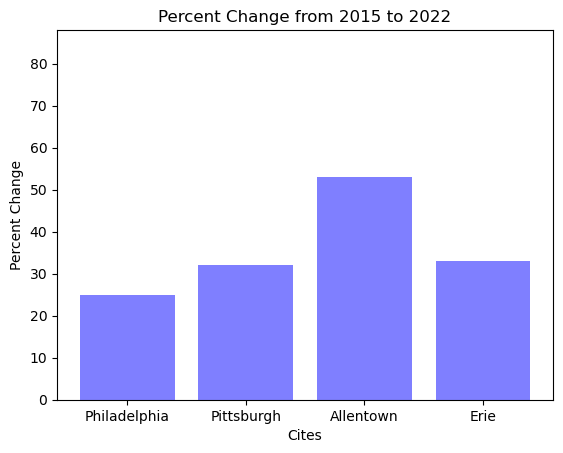

In [219]:
#Bar graph 
percent_1 = [25, 32, 53, 33, ]
x_axis_1 = ["Philadelphia","Pittsburgh","Allentown","Erie"]
plt.bar(x_axis_1, percent_1, color='b', alpha=0.5, align="center")
tick_locations_1 = [value for value in x_axis_1]
plt.xticks(tick_locations,["Philadelphia", "Pittsburgh", "Allentown", "Erie",])
plt.ylim(0, max(percent)+10)
plt.title("Percent Change from 2015 to 2022")
plt.xlabel("Cites")
plt.ylabel("Percent Change")

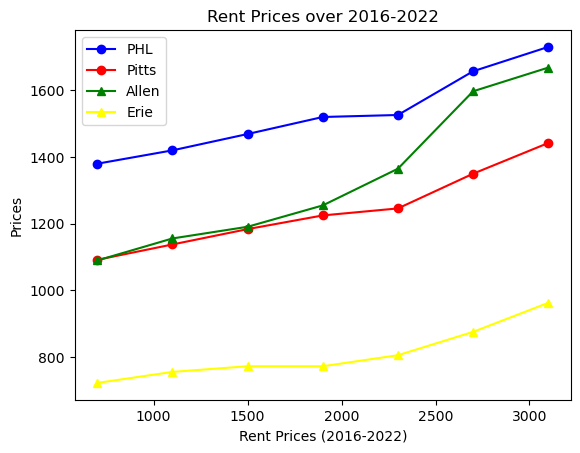

In [220]:
#create Line graph for rent
x_axis_1 = np.arange(700, 3500, 400)
phl= [1380,1420,1469,1520,1526,1657,1730] 
pitts=[1092,1138,1184,1225,1246,1350,1442]
allen=[1090,1156,1191,1255,1365,1597,1668]
erie=[723,756,773,773,806,876,963]
plt.plot(x_axis_1, phl,marker ='o', color='blue', label="PHL")
plt.plot(x_axis_1, pitts, marker ='o', color='red', label="Pitts")
plt.plot(x_axis_1, allen, marker ='^', color='Green', label="Allen")
plt.plot(x_axis_1, erie,marker ='^', color='Yellow', label="Erie")
plt.xlabel("Rent Prices (2016-2022)")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.title("Rent Prices over 2016-2022")

plt.show()

## Occupancy rates in Philadelphia and rentals as a percentage of household income (Stephen)

In [221]:
Housing_2021="Resources/2021PhilaHousing.csv"
Housing_2019="Resources/2019PhilaHousing.csv"
Housing_2018="Resources/2018PhilaHousing.csv"
Housing_2017="Resources/2017PhilaHousing.csv"
Housing_2016="Resources/2016PhilaHousing.csv"
Housing_2015="Resources/2015PhilaHousing.csv"
Housing_2014="Resources/2014PhilaHousing.csv"
Housing_2013="Resources/2013PhilaHousing.csv"
Housing_2012="Resources/2012PhilaHousing.csv"
Housing_2011="Resources/2011PhilaHousing.csv"
Housing_2010="Resources/2010PhilaHousing.csv"

In [222]:
housing_21=pd.read_csv(Housing_2021)
housing_19=pd.read_csv(Housing_2019)
housing_18=pd.read_csv(Housing_2018)
housing_17=pd.read_csv(Housing_2017)
housing_16=pd.read_csv(Housing_2016)
housing_15=pd.read_csv(Housing_2015)
housing_14=pd.read_csv(Housing_2014)
housing_13=pd.read_csv(Housing_2013)
housing_12=pd.read_csv(Housing_2012)
housing_11=pd.read_csv(Housing_2011)
housing_10=pd.read_csv(Housing_2010)

In [223]:
medians=pd.DataFrame({'2010':[housing_10['Philadelphia city, Pennsylvania!!Estimate'].iloc[147]],
'2011':[float(housing_11['Philadelphia city, Pennsylvania!!Estimate'].iloc[147])],
'2012':[float(housing_12['Philadelphia city, Pennsylvania!!Estimate'].iloc[147])],
'2013':[float(housing_13['Philadelphia city, Pennsylvania!!Estimate'].iloc[147])],
'2014':[float(housing_14['Philadelphia city, Pennsylvania!!Estimate'].iloc[147])],
'2015':[float(housing_15['Philadelphia city, Pennsylvania!!Estimate'].iloc[149])],
'2016':[float(housing_16['Philadelphia city, Pennsylvania!!Estimate'].iloc[149])],
'2017':[float(housing_17['Philadelphia city, Pennsylvania!!Estimate'].iloc[149])],
'2018':[float(housing_18['Philadelphia city, Pennsylvania!!Estimate'].iloc[149].replace(',',''))],
'2019':[float(housing_19['Philadelphia city, Pennsylvania!!Estimate'].iloc[149].replace(',',''))],
'2021':[float(housing_21['Philadelphia city, Pennsylvania!!Estimate'].iloc[149].replace(',',''))]})
#turningmydataframebackintolists=pd.to_numeric(medians.columns).tolist()
#becauseplottingthedataframewasntworking=medians.iloc[0].tolist()
#plt.plot(turningmydataframebackintolists,becauseplottingthedataframewasntworking)
#plt.title("Change in Median Rental Price in Philadelphia 2010-2021")
medians

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
0,836,853.0,876.0,913.0,936.0,952.0,976.0,969.0,1032.0,1079.0,1181.0


In [224]:
#Isolate Occupancy Data
Occupancy21=housing_21.iloc[1:15]
Occupancy19=housing_19.iloc[1:15]
Occupancy18=housing_18.iloc[1:15]
Occupancy17=housing_17.iloc[1:15]
Occupancy16=housing_16.iloc[1:15]
Occupancy15=housing_15.iloc[1:15]
Occupancy14=housing_14.iloc[1:15]
Occupancy13=housing_13.iloc[1:15]
Occupancy12=housing_12.iloc[1:15]
Occupancy11=housing_11.iloc[1:15]
Occupancy10=housing_10.iloc[1:15]

In [225]:
O21=Occupancy21.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O19=Occupancy19.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O18=Occupancy18.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O17=Occupancy17.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O16=Occupancy16.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O15=Occupancy15.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O14=Occupancy14.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O13=Occupancy13.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O12=Occupancy12.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O11=Occupancy11.drop(['Philadelphia city, Pennsylvania!!Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
O10=Occupancy10.drop(['Philadelphia city, Pennsylvania!!Estimate Margin of Error', 'Philadelphia city, Pennsylvania!!Percent',
                      'Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)

In [226]:
O10=O10.rename({'Philadelphia city, Pennsylvania!!Estimate':'2010 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2010 Percent'},axis='columns')
O11=O11.rename({'Philadelphia city, Pennsylvania!!Estimate':'2011 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2011 Percent'},axis='columns')
O12=O12.rename({'Philadelphia city, Pennsylvania!!Estimate':'2012 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2012 Percent'},axis='columns')
O13=O13.rename({'Philadelphia city, Pennsylvania!!Estimate':'2013 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2013 Percent'},axis='columns')
O14=O14.rename({'Philadelphia city, Pennsylvania!!Estimate':'2014 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2014 Percent'},axis='columns')
O15=O15.rename({'Philadelphia city, Pennsylvania!!Estimate':'2015 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2015 Percent'},axis='columns')
O16=O16.rename({'Philadelphia city, Pennsylvania!!Estimate':'2016 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2016 Percent'},axis='columns')
O17=O17.rename({'Philadelphia city, Pennsylvania!!Estimate':'2017 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2017 Percent'},axis='columns')
O18=O18.rename({'Philadelphia city, Pennsylvania!!Estimate':'2018 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2018 Percent'},axis='columns')
O19=O19.rename({'Philadelphia city, Pennsylvania!!Estimate':'2019 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2019 Percent'},axis='columns')
O21=O21.rename({'Philadelphia city, Pennsylvania!!Estimate':'2021 Est.', 
                'Philadelphia city, Pennsylvania!!Percent':'2021 Percent'},axis='columns')

In [227]:
O10=O10['2010 Est.'].str.replace(',','')
O11=O11['2011 Est.'].str.replace(',','')
O12=O12['2012 Est.'].str.replace(',','')
O13=O13['2013 Est.'].str.replace(',','')
O14=O14['2014 Est.'].str.replace(',','')
O15=O15['2015 Est.'].str.replace(',','')
O16=O16['2016 Est.'].str.replace(',','')
O17=O17['2017 Est.'].str.replace(',','')
O18=O18['2018 Est.'].str.replace(',','')
O19=O19['2019 Est.'].str.replace(',','')
O21=O21['2021 Est.'].str.replace(',','')

In [228]:
O10=O10.astype(float)
O11=O11.astype(float)
O12=O12.astype(float)
O13=O13.astype(float)
O14=O14.astype(float)
O15=O15.astype(float)
O16=O16.astype(float)
O17=O17.astype(float)
O18=O18.astype(float)
O19=O19.astype(float)
O21=O21.astype(float)

In [229]:
all_occupancy=pd.concat([O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O21], axis=1)
plot_occupancy=all_occupancy.iloc[0:3]

Text(-0.25, 125000, '2010 Vacancy Rate=14.1%')

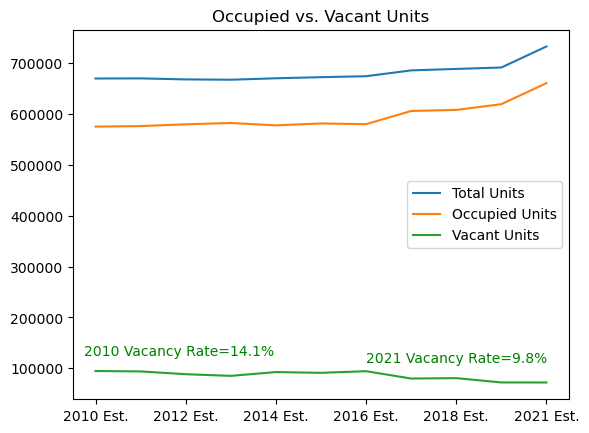

In [230]:
plot_occupancy.T.plot(kind='line')
plt.legend(["Total Units","Occupied Units","Vacant Units"])
plt.title("Occupied vs. Vacant Units")
annotation1="2021 Vacancy Rate=9.8%"
annotation2="2010 Vacancy Rate=14.1%"
plt.annotate(annotation1,(6,112000),fontsize=10,color='green')
plt.annotate(annotation2,(-.25,125000),fontsize=10,color='green')

In [231]:
#Isolate Gross Rent Data
igrp10=housing_10.iloc[150:158]
igrp11=housing_11.iloc[150:158]
igrp12=housing_12.iloc[150:158]
igrp13=housing_13.iloc[150:158]
igrp14=housing_14.iloc[150:158]
igrp15=housing_15.iloc[152:160]
igrp16=housing_16.iloc[152:160]
igrp17=housing_17.iloc[152:160]
igrp18=housing_18.iloc[152:160]
igrp19=housing_19.iloc[152:160]
igrp21=housing_21.iloc[152:160]

In [232]:
igrp21

,Label (Grouping),"Philadelphia city, Pennsylvania!!Estimate","Philadelphia city, Pennsylvania!!Margin of Error","Philadelphia city, Pennsylvania!!Percent","Philadelphia city, Pennsylvania!!Percent Margin of Error"
152,Occupied units paying rent (excluding unit...,"290,133","±8,110","290,133",(X)
153,Less than 15.0 percent,"38,605","±3,870",13.3%,±1.2
154,15.0 to 19.9 percent,"33,473","±3,171",11.5%,±1.1
155,20.0 to 24.9 percent,"33,057","±3,841",11.4%,±1.3
156,25.0 to 29.9 percent,"32,583","±3,373",11.2%,±1.1
157,30.0 to 34.9 percent,"25,801","±3,372",8.9%,±1.1
158,35.0 percent or more,"126,614","±7,245",43.6%,±2.0
159,Not computed,"21,853","±3,440",(X),(X)


In [233]:
igrp10=igrp10.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2010',
                      'Philadelphia city, Pennsylvania!!Percent':'2010 Percent' }, axis='columns')
igrp11=igrp11.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2011',
                     'Philadelphia city, Pennsylvania!!Percent':'2011 Percent' }, axis='columns')
igrp12=igrp12.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2012',
                      'Philadelphia city, Pennsylvania!!Percent':'2012 Percent' }, axis='columns')
igrp13=igrp13.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2013',
                      'Philadelphia city, Pennsylvania!!Percent':'2013 Percent' }, axis='columns')
igrp14=igrp14.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2014',
                      'Philadelphia city, Pennsylvania!!Percent':'2014 Percent' }, axis='columns')
igrp15=igrp15.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2015',
                      'Philadelphia city, Pennsylvania!!Percent':'2015 Percent' }, axis='columns')
igrp16=igrp16.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2016',
                      'Philadelphia city, Pennsylvania!!Percent':'2016 Percent' }, axis='columns')
igrp17=igrp17.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2017',
                      'Philadelphia city, Pennsylvania!!Percent':'2017 Percent' }, axis='columns')
igrp18=igrp18.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2018',
                      'Philadelphia city, Pennsylvania!!Percent':'2018 Percent' }, axis='columns')
igrp19=igrp19.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2019',
                      'Philadelphia city, Pennsylvania!!Percent':'2019 Percent' }, axis='columns')
igrp21=igrp21.rename({'Philadelphia city, Pennsylvania!!Estimate':'Census Estimate 2021',
                      'Philadelphia city, Pennsylvania!!Percent':'2021 Percent' }, axis='columns')

In [234]:
igrp21=igrp21.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp19=igrp19.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp18=igrp18.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp17=igrp17.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp16=igrp16.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp15=igrp15.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp14=igrp14.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp13=igrp13.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp12=igrp12.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp11=igrp11.drop(['Philadelphia city, Pennsylvania!!Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)
igrp10=igrp10.drop(['Philadelphia city, Pennsylvania!!Estimate Margin of Error','Philadelphia city, Pennsylvania!!Percent Margin of Error'], axis=1)

In [235]:
def strip_strings(s):
    return s.strip()
igrp10['Label (Grouping)'] = igrp10['Label (Grouping)'].apply(strip_strings)
igrp11['Label (Grouping)'] = igrp11['Label (Grouping)'].apply(strip_strings)
igrp12['Label (Grouping)'] = igrp12['Label (Grouping)'].apply(strip_strings)
igrp13['Label (Grouping)'] = igrp13['Label (Grouping)'].apply(strip_strings)
igrp14['Label (Grouping)'] = igrp14['Label (Grouping)'].apply(strip_strings)
igrp15['Label (Grouping)'] = igrp15['Label (Grouping)'].apply(strip_strings)
igrp16['Label (Grouping)'] = igrp16['Label (Grouping)'].apply(strip_strings)
igrp17['Label (Grouping)'] = igrp17['Label (Grouping)'].apply(strip_strings)
igrp18['Label (Grouping)'] = igrp18['Label (Grouping)'].apply(strip_strings)
igrp19['Label (Grouping)'] = igrp19['Label (Grouping)'].apply(strip_strings)
igrp21['Label (Grouping)'] = igrp21['Label (Grouping)'].apply(strip_strings)

In [236]:
#Merge Gross Rent to one dataframe
merge=igrp10.merge(igrp11, on='Label (Grouping)', how='left')
merge=merge.merge(igrp12, on='Label (Grouping)', how='left')
merge=merge.merge(igrp13, on='Label (Grouping)', how='left')
merge=merge.merge(igrp14, on='Label (Grouping)', how='left')
merge=merge.merge(igrp15, on='Label (Grouping)', how='left')
merge=merge.merge(igrp16, on='Label (Grouping)', how='left')
merge=merge.merge(igrp17, on='Label (Grouping)', how='left')
merge=merge.merge(igrp18, on='Label (Grouping)', how='left')
merge=merge.merge(igrp19, on='Label (Grouping)', how='left')
all_merge=merge.merge(igrp21, on='Label (Grouping)', how='left')

In [237]:
#New dataframe only tracking yearly percents
Percents_only=all_merge[['Label (Grouping)','2010 Percent', '2011 Percent', '2012 Percent', '2013 Percent', '2014 Percent', '2015 Percent', '2016 Percent',
          '2017 Percent', '2018 Percent', '2019 Percent', '2021 Percent']]
Percents_only

,Label (Grouping),2010 Percent,2011 Percent,2012 Percent,2013 Percent,2014 Percent,2015 Percent,2016 Percent,2017 Percent,2018 Percent,2019 Percent,2021 Percent
0,Occupied units paying rent (excluding units wh...,"238,432","242,853","252,747","259,041","254,585","253,807","250,113","246,758","264,075","280,222","290,133"
1,Less than 15.0 percent,8.5%,8.9%,9.8%,9.6%,10.3%,11.4%,11.2%,12.1%,12.3%,11.6%,13.3%
2,15.0 to 19.9 percent,11.1%,9.1%,10.2%,11.0%,10.2%,10.8%,12.7%,12.6%,12.5%,11.5%,11.5%
3,20.0 to 24.9 percent,10.7%,11.4%,11.5%,10.4%,9.9%,11.0%,11.7%,10.4%,11.1%,10.9%,11.4%
4,25.0 to 29.9 percent,10.8%,12.4%,11.5%,11.4%,12.0%,10.4%,11.0%,11.3%,10.3%,11.2%,11.2%
5,30.0 to 34.9 percent,8.6%,7.1%,8.8%,8.2%,8.2%,8.5%,7.6%,9.0%,9.2%,9.3%,8.9%
6,35.0 percent or more,50.3%,51.1%,48.2%,49.4%,49.2%,47.9%,45.8%,44.6%,44.7%,45.4%,43.6%
7,Not computed,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [238]:
strip21=Percents_only['2021 Percent'].str.replace(',','')
strip19=Percents_only['2019 Percent'].str.replace(',','')
strip18=Percents_only['2018 Percent'].str.replace(',','')
strip17=Percents_only['2017 Percent'].str.replace(',','')
strip16=Percents_only['2016 Percent'].str.replace(',','')
strip15=Percents_only['2015 Percent'].str.replace(',','')
strip14=Percents_only['2014 Percent'].str.replace(',','')
strip13=Percents_only['2013 Percent'].str.replace(',','')
strip12=Percents_only['2012 Percent'].str.replace(',','')
strip11=Percents_only['2011 Percent'].str.replace(',','')
strip10=Percents_only['2010 Percent'].str.replace(',','')

flt10=strip10.str.replace('%','')
flt10=flt10[0:7].astype(float)

In [239]:
flt21=strip21.str.replace('%','')
flt19=strip19.str.replace('%','')
flt18=strip18.str.replace('%','')
flt17=strip17.str.replace('%','')
flt16=strip16.str.replace('%','')
flt15=strip15.str.replace('%','')
flt14=strip14.str.replace('%','')
flt13=strip13.str.replace('%','')
flt12=strip12.str.replace('%','')
flt11=strip11.str.replace('%','')
flt11=flt11[0:7].astype(float)
flt12=flt12[0:7].astype(float)
flt13=flt13[0:7].astype(float)
flt14=flt14[0:7].astype(float)
flt15=flt15[0:7].astype(float)
flt16=flt16[0:7].astype(float)
flt17=flt17[0:7].astype(float)
flt18=flt18[0:7].astype(float)
flt19=flt19[0:7].astype(float)
flt21=flt21[0:7].astype(float)

In [240]:
df_grp=pd.concat([flt10,flt11, flt12,flt13, flt14, flt15, flt16, flt17, flt18, flt19, flt21], axis=1)
df_grp

,2010 Percent,2011 Percent,2012 Percent,2013 Percent,2014 Percent,2015 Percent,2016 Percent,2017 Percent,2018 Percent,2019 Percent,2021 Percent
0,238432.0,242853.0,252747.0,259041.0,254585.0,253807.0,250113.0,246758.0,264075.0,280222.0,290133.0
1,8.5,8.9,9.8,9.6,10.3,11.4,11.2,12.1,12.3,11.6,13.3
2,11.1,9.1,10.2,11.0,10.2,10.8,12.7,12.6,12.5,11.5,11.5
3,10.7,11.4,11.5,10.4,9.9,11.0,11.7,10.4,11.1,10.9,11.4
4,10.8,12.4,11.5,11.4,12.0,10.4,11.0,11.3,10.3,11.2,11.2
5,8.6,7.1,8.8,8.2,8.2,8.5,7.6,9.0,9.2,9.3,8.9
6,50.3,51.1,48.2,49.4,49.2,47.9,45.8,44.6,44.7,45.4,43.6


In [241]:
grp_df=df_grp.iloc[1:7]
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2021']
#plt.plot(years, grp_df.T[6], color='pink', label='>35%')
#plt.plot(years, grp_df.T[5], color='purple', label='30-35%')
#plt.plot(years, grp_df.T[4], color='orange', label='25-30%')
#plt.plot(years, grp_df.T[3], color='red', label='20-25%')
#plt.plot(years, grp_df.T[2], color='blue', label='15-20%')
#plt.plot(years, grp_df.T[1], color='green', label='<15%')

In [242]:
#combining groups to make chart for readable
group15_25=grp_df.iloc[1:3].sum()
group25_35=grp_df.iloc[3:5].sum()

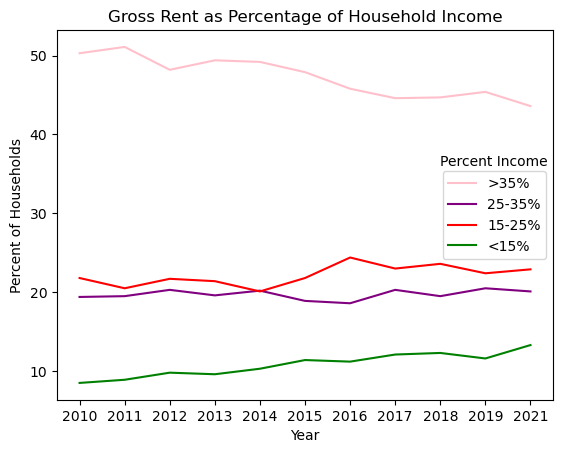

In [243]:
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2021']
plt.plot(years, grp_df.T[6], color='pink', label='>35%')
plt.plot(years, group25_35, color='purple', label='25-35%')
plt.plot(years, group15_25, color='red', label='15-25%')
plt.plot(years, grp_df.T[1], color='green', label='<15%')

plt.annotate(annotation2,(-.25,125000),fontsize=10,color='green')

plt.legend(loc='best')
plt.title("Gross Rent as Percentage of Household Income")
plt.xlabel("Year")
plt.ylabel("Percent of Households")
annotation3="Percent Income"
plt.annotate(annotation3,(8,36),color='black')
plt.show()

## Household income by zipcode (Katy)

In [244]:
# Demographic data files not used in presentation

dem_housing_info_2021_path = "Resources/demographics/dem_housing_info_2021.csv"
dem_housing_info_2020_path = "Resources/demographics/dem_housing_info_2020.csv"
dem_housing_info_2019_path = "Resources/demographics/dem_housing_info_2019.csv"
dem_housing_info_2018_path = "Resources/demographics/dem_housing_info_2018.csv"
dem_housing_info_2017_path = "Resources/demographics/dem_housing_info_2017.csv"
dem_housing_info_2016_path = "Resources/demographics/dem_housing_info_2016.csv"
dem_housing_info_2015_path = "Resources/demographics/dem_housing_info_2015.csv"

# Read the data 
dem_housing_info_2021=pd.read_csv(dem_housing_info_2021_path)
dem_housing_info_2020=pd.read_csv(dem_housing_info_2020_path)
dem_housing_info_2019=pd.read_csv(dem_housing_info_2019_path)
dem_housing_info_2018=pd.read_csv(dem_housing_info_2018_path)
dem_housing_info_2017=pd.read_csv(dem_housing_info_2017_path)
dem_housing_info_2016=pd.read_csv(dem_housing_info_2016_path)
dem_housing_info_2015=pd.read_csv(dem_housing_info_2015_path)

# Create DataFrame
demographics_2021_df=pd.DataFrame(dem_housing_info_2021)
demographics_2020_df=pd.DataFrame(dem_housing_info_2020)
demographics_2019_df=pd.DataFrame(dem_housing_info_2019)
demographics_2018_df=pd.DataFrame(dem_housing_info_2018)
demographics_2017_df=pd.DataFrame(dem_housing_info_2017)
demographics_2016_df=pd.DataFrame(dem_housing_info_2016)
demographics_2015_df=pd.DataFrame(dem_housing_info_2015)

In [245]:
# Study financial data files
financials_by_zip_2021_path="Resources/demographics/financials_by_zip_2021.csv"
financials_by_zip_2020_path="Resources/demographics/financials_by_zip_2020.csv"
financials_by_zip_2019_path="Resources/demographics/financials_by_zip_2019.csv"
financials_by_zip_2018_path="Resources/demographics/financials_by_zip_2018.csv"
financials_by_zip_2017_path="Resources/demographics/financials_by_zip_2017.csv"
financials_by_zip_2016_path="Resources/demographics/financials_by_zip_2016.csv"
financials_by_zip_2015_path="Resources/demographics/financials_by_zip_2015.csv"

# Read the data
financials_by_zip_2021=pd.read_csv(financials_by_zip_2021_path)
financials_by_zip_2020=pd.read_csv(financials_by_zip_2020_path)
financials_by_zip_2019=pd.read_csv(financials_by_zip_2019_path)
financials_by_zip_2018=pd.read_csv(financials_by_zip_2018_path)
financials_by_zip_2017=pd.read_csv(financials_by_zip_2017_path)
financials_by_zip_2016=pd.read_csv(financials_by_zip_2016_path)
financials_by_zip_2015=pd.read_csv(financials_by_zip_2015_path)

# Create DataFrame
financials_by_zip_2021_df=pd.DataFrame(financials_by_zip_2021)
financials_by_zip_2020_df=pd.DataFrame(financials_by_zip_2020)
financials_by_zip_2019_df=pd.DataFrame(financials_by_zip_2019)
financials_by_zip_2018_df=pd.DataFrame(financials_by_zip_2018)
financials_by_zip_2017_df=pd.DataFrame(financials_by_zip_2017)
financials_by_zip_2016_df=pd.DataFrame(financials_by_zip_2016)
financials_by_zip_2015_df=pd.DataFrame(financials_by_zip_2015)

# Clean columns
financials_by_zip_2021_df=financials_by_zip_2021_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2020_df=financials_by_zip_2020_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2019_df=financials_by_zip_2019_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2018_df=financials_by_zip_2018_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2017_df=financials_by_zip_2017_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2016_df=financials_by_zip_2016_df[["Label (Grouping)","Occupied housing units","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2015_df=financials_by_zip_2015_df[["Label (Grouping)","Occupied housing units","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","MONTHLY HOUSING COSTS!!Median (dollars)"]]

# Rename columns
financials_by_zip_2021_df=financials_by_zip_2021_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2020_df=financials_by_zip_2020_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2019_df=financials_by_zip_2019_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2018_df=financials_by_zip_2018_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2017_df=financials_by_zip_2017_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2016_df=financials_by_zip_2016_df.rename(columns={"Label (Grouping)":"Zip Code","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2015_df=financials_by_zip_2015_df.rename(columns={"Label (Grouping)":"Zip Code","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})

In [246]:
# Format data
#list(financials_by_zip_2021_df["Zip Code"].str.strip())

# Define function to condense rows with renter info
def clean_renter_df(df):
    new_data = []
    for row in range(0,df.shape[0],13):
        
        zip_row = df.loc[row]
        rental_row = df.loc[row+10]

        # Generate New Rows of Data
        new_data_row=[]
        
        # Get data from zip_row
        zip_code = zip_row["Zip Code"]
        new_data_row.append(zip_code)
        
        # Get data from rental row
        housing_units=rental_row["Occupied housing units"]
        new_data_row.append(housing_units)
        income=rental_row["Median household income"]
        new_data_row.append(income)
        housing_costs=rental_row["Median monthly housing costs"]
        new_data_row.append(housing_costs)

        # Append row to construct dataframe
        new_data.append(new_data_row)

    new_dataframe = pd.DataFrame(new_data)
    #print(new_dataframe)
    return new_dataframe

In [247]:
clean_2021=clean_renter_df(financials_by_zip_2021_df)
clean_2021=clean_2021.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2021=clean_2021.loc[clean_2021["Occupied housing units"]!="0"]
clean_2021["Year"]=2021
clean_2021=clean_2021[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2021.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2021,ZCTA5 19102,"2,540","101,288","2,179"
1,2021,ZCTA5 19103,"11,377","77,647","1,836"
2,2021,ZCTA5 19104,"14,424","26,959","1,092"
3,2021,ZCTA5 19106,"4,244","102,904","1,930"
4,2021,ZCTA5 19107,"6,918","53,938","1,429"


In [248]:
clean_2020=clean_renter_df(financials_by_zip_2020_df)
clean_2020=clean_2020.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2020=clean_2020.loc[clean_2020["Occupied housing units"]!="0"]
clean_2020["Year"]=2020
clean_2020=clean_2020[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2020.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2020,ZCTA5 19102,"2,506","95,128","2,114"
1,2020,ZCTA5 19103,"11,198","74,336","1,770"
2,2020,ZCTA5 19104,"13,048","23,953","1,008"
3,2020,ZCTA5 19106,"3,966","97,548","1,830"
4,2020,ZCTA5 19107,"6,177","52,083","1,384"


In [249]:
clean_2019=clean_renter_df(financials_by_zip_2019_df)
clean_2019=clean_2019.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2019=clean_2019.loc[clean_2019["Occupied housing units"]!="0"]
clean_2019["Year"]=2019
clean_2019=clean_2019[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2019.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2019,ZCTA5 19102,"2,210","85,192","2,058"
1,2019,ZCTA5 19103,"10,147","66,919","1,758"
2,2019,ZCTA5 19104,"12,838","22,508",997
3,2019,ZCTA5 19106,"3,429","90,799","1,788"
4,2019,ZCTA5 19107,"6,100","52,627","1,346"


In [250]:
clean_2018=clean_renter_df(financials_by_zip_2018_df)
clean_2018=clean_2018.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2018=clean_2018.loc[clean_2018["Occupied housing units"]!="0"]
clean_2018["Year"]=2018
clean_2018=clean_2018[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2018.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2018,ZCTA5 19102,"2,088","81,372","1,933"
1,2018,ZCTA5 19103,"10,182","64,869","1,708"
2,2018,ZCTA5 19104,"12,797","20,841",969
3,2018,ZCTA5 19106,"3,394","100,185","1,772"
4,2018,ZCTA5 19107,"5,789","47,176","1,273"


In [251]:
clean_2017=clean_renter_df(financials_by_zip_2017_df)
clean_2017=clean_2017.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2017=clean_2017.loc[clean_2017["Occupied housing units"]!="0"]
clean_2017["Year"]=2017
clean_2017=clean_2017[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2017.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2017,ZCTA5 19102,"2,163","89,298","1,996"
1,2017,ZCTA5 19103,"9,819","59,731","1,615"
2,2017,ZCTA5 19104,"12,760","20,272",932
3,2017,ZCTA5 19106,"3,357","86,641","1,745"
4,2017,ZCTA5 19107,"5,777","41,359","1,214"


In [252]:
# Format data
#list(financials_by_zip_2021_df["Zip Code"].str.strip())

# Define second function to address change in total rows of data for 2015 & 2016
def clean_renter2_df(df):
    new_data = []
    for row in range(0,df.shape[0],7):
        
        zip_row = df.loc[row]
        rental_row = df.loc[row+6]

        # Generate New Rows of Data
        new_data_row=[]
        
        # Get data from zip_row
        zip_code = zip_row["Zip Code"]
        new_data_row.append(zip_code)
        
        # Get data from rental row
        housing_units=rental_row["Occupied housing units"]
        new_data_row.append(housing_units)
        income=rental_row["Median household income"]
        new_data_row.append(income)
        housing_costs=rental_row["Median monthly housing costs"]
        new_data_row.append(housing_costs)

        # Append row to construct dataframe
        new_data.append(new_data_row)

    new_dataframe = pd.DataFrame(new_data)
    #print(new_dataframe)
    return new_dataframe

In [253]:
clean_2016=clean_renter2_df(financials_by_zip_2016_df)
clean_2016=clean_2016.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2016=clean_2016.loc[clean_2016["Occupied housing units"]!="0"]
clean_2016["Year"]=2016
clean_2016=clean_2016[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2016.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2016,ZCTA5 19102,"2,220","99,032","2,014"
1,2016,ZCTA5 19103,"9,649","55,895","1,549"
2,2016,ZCTA5 19104,"12,596","17,669",910
3,2016,ZCTA5 19106,"3,390","82,765","1,680"
4,2016,ZCTA5 19107,"5,470","42,692","1,197"


In [254]:
clean_2015=clean_renter2_df(financials_by_zip_2015_df)
clean_2015=clean_2015.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2015=clean_2015.loc[clean_2015["Occupied housing units"]!="0"]
clean_2015["Year"]=2015
clean_2015=clean_2015[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2015.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2015,ZCTA5 19102,"2,071","86,513","1,987"
1,2015,ZCTA5 19103,"9,472","52,295","1,460"
2,2015,ZCTA5 19104,"12,461","16,198",879
3,2015,ZCTA5 19106,"3,441","88,859","1,637"
4,2015,ZCTA5 19107,"5,412","41,285","1,152"


In [255]:
# Merge 2015 and 2021 data frames
beg_end_data=pd.merge(clean_2015,clean_2021,how="left",on="Zip Code")

# Rename columns with year
beg_end_data=beg_end_data.rename(columns={"Occupied housing units_x":"Occupied housing units 2015",
                                         "Median household income_x":"Median household income 2015",
                                         "Median monthly housing costs_x":"Median monthly housing costs 2015",
                                         "Occupied housing units_y":"Occupied housing units 2021",
                                         "Median household income_y":"Median household income 2021",
                                         "Median monthly housing costs_y":"Median monthly housing costs 2021"})
# Remove year columns
beg_end_data=beg_end_data[["Zip Code","Occupied housing units 2015","Median household income 2015","Median monthly housing costs 2015",
                          "Occupied housing units 2021","Median household income 2021","Median monthly housing costs 2021"]]
beg_end_data.head()

,Zip Code,Occupied housing units 2015,Median household income 2015,Median monthly housing costs 2015,Occupied housing units 2021,Median household income 2021,Median monthly housing costs 2021
0,ZCTA5 19102,"2,071","86,513","1,987","2,540","101,288","2,179"
1,ZCTA5 19103,"9,472","52,295","1,460","11,377","77,647","1,836"
2,ZCTA5 19104,"12,461","16,198",879,"14,424","26,959","1,092"
3,ZCTA5 19106,"3,441","88,859","1,637","4,244","102,904","1,930"
4,ZCTA5 19107,"5,412","41,285","1,152","6,918","53,938","1,429"


In [256]:
# Create zip map to show percent change in median income

# Read in polygon zip code .shp file from OpenDataPhilly (https://opendataphilly.org/datasets/zip-codes/)
# See geopandas user guide (https://geopandas.org/en/latest/docs/user_guide/mapping.html)
zip_code_map = geopandas.GeoDataFrame.from_file("Resources/zipcodes/Zipcodes_Poly.shp")

# Sort data frame in order of ascending zip codes
zip_code_map_sorted=zip_code_map.sort_values(by="CODE")

# Manually add and fill percent change column
zip_code_map_sorted["% Change in Median Income 2015-2021"]=[17.07,48.48,66.43,15.8,23.46,None,29.84,None,13.4,22.8,54.4,
                                                           11.48,29.44,33.12,78.9,0-2.1,57.2,29.22,116.19,101.19,7.79,
                                                           36.88,73.91,54.89,73.41,19.53,93,60.37,24.22,36.82,4.92,43.31,
                                                           29,37.2,39.74,42.83,42.21,16.19,94.64,86,25.5,87.26,54,47.7,
                                                           46.3,58.76,22,33.16]

zip_code_map_sorted.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,% Change in Median Income 2015-2021
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",17.07
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",48.48
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",66.43
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",15.80
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",23.46


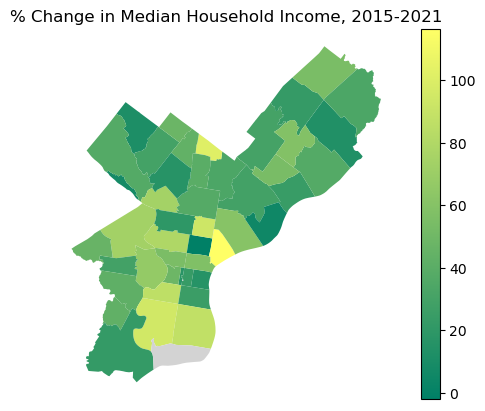

Median income data missing for 19109 and 19112


In [257]:
# Create zip code map
ax = zip_code_map_sorted.plot(column="% Change in Median Income 2015-2021", legend=True, missing_kwds={'color': 'lightgrey'},cmap="summer")
ax.set_axis_off()
ax.set_title("% Change in Median Household Income, 2015-2021")
plt.show()
print("Median income data missing for 19109 and 19112")

## Rental prices, home values, and property tax delinquencies by zipcode (Andrew)

In [258]:
# Files to Load
homevalues_data_to_load = Path("Resources/zillow/Home_values.csv")
rentals_data_to_load = Path("Resources/zillow/Rentals.csv")

# Read Home Values and Rentals data files and store into Pandas DataFrames
home_values_data_df = pd.read_csv(homevalues_data_to_load)
rentals_data_df = pd.read_csv(rentals_data_to_load)

In [259]:
# Preview data
rentals_data_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1629.242622,...,2001.059639,2003.698184,2000.321428,2011.325499,2028.797203,2046.553696,2054.750052,2043.356299,2037.423493,2028.667312
1,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1259.247016,...,1747.687237,1750.547753,1747.404695,1748.886799,1757.625595,1761.473108,1767.802445,1766.592068,1779.745781,1789.170452
2,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1361.394189,...,2016.497134,2012.387028,2035.142050,2039.999302,2058.720070,2068.142179,2073.162509,2077.240323,2072.558575,2067.281322
3,62093,5,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2832.606339,2839.834567,2842.369853,2850.689315,2861.089431,2882.683156,2896.250166,2912.255726,2912.522698,2899.350980
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1432.122873,1428.138042,1434.759131,1435.028171,1465.724566,1489.823224,1495.844601,1489.703755,1483.052695,1490.744811


In [260]:
# Narrow down dataframe to city = Philadelphia
philadelphia_home_values = home_values_data_df.loc[home_values_data_df["City"]=="Philadelphia",:]
philadelphia_rentals = rentals_data_df.loc[rentals_data_df["City"]=="Philadelphia",:]

In [261]:
# Narrow down dataframe to state = PA
philadelphiaPA_home_values = philadelphia_home_values.loc[philadelphia_home_values["State"]=="PA",:]
philadelphiaPA_rentals = philadelphia_rentals.loc[philadelphia_rentals["State"]=="PA",:]

In [262]:
# Inspect new rentals dataframe
philadelphiaPA_rentals.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
155,65787,165,19120,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1203.421072,1220.504884,1199.989943,1213.905556
208,65791,219,19124,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1196.900564,1237.621055,1247.973504,1259.517910,1248.797394,1265.692154,1275.242699,1262.787865,1253.558650,1253.625000
256,65779,270,19111,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1291.416404,1301.700648,1309.246023,1319.921192,1305.118156,1314.279459,1323.005592,1332.273373,1332.387246,1335.416667
306,65810,325,19143,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1354.242262,1354.961308,1370.727340,1355.199031,1366.772315,1367.153576,1380.082574,1384.937684,1383.230081,1380.625253
395,65816,418,19149,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1432.011197,1420.907854,1435.803777,1457.702819,1477.249704,1467.589811,1437.167522,1422.150398,1423.788940,1421.388889


In [263]:
# Inspect new home values dataframe
philadelphiaPA_home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
106,65787,165,19120,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,46052.22798,...,160653.7685,160228.5333,159977.9659,159317.2287,159254.1569,158574.0554,157761.6849,156453.0387,156328.2412,157079.9906
160,65791,219,19124,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,36933.36134,...,155882.5954,155710.6857,156045.0456,155730.7655,156031.1885,155727.5066,155732.2020,155015.2869,155243.1947,155755.5130
211,65779,270,19111,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,77421.79785,...,280331.8575,278726.0215,277510.2150,275911.7848,275762.0408,275935.9873,276811.6406,277044.1193,278027.6078,279611.3808
265,65810,325,19143,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,26136.92897,...,130220.3908,129735.4468,129696.3963,129404.5409,129907.9231,130169.5887,130502.1901,129479.9742,128758.0187,127886.7503
358,65816,418,19149,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,62956.91926,...,225381.0579,223930.5154,222930.1662,222083.9724,221794.5496,221191.3808,220821.6689,220150.7617,220256.4486,220640.6397


In [264]:
# Reduce columns to 2015-2023, as that is how far back we have rental data
# and we no longer need city, state, etc.
phila_homes = philadelphiaPA_home_values[['RegionName', '6/30/2015','6/30/2016','6/30/2017','6/30/2018',
                                         '6/30/2019','6/30/2020','6/30/2021','6/30/2022','6/30/2023']]

phila_rentals = philadelphiaPA_rentals[['RegionName', '2015-01-31', '2015-02-28',
'2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
'2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
'2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
'2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
'2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
'2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
'2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
'2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
'2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
'2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
'2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
'2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
'2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
'2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
'2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
'2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
'2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
'2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
'2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
'2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
'2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
'2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
'2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
'2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
'2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30']]

In [265]:
# Minor data wrangling
phl_zillow_homevalues = phila_homes.rename(columns={'RegionName':'Zip Code'})
phl_zillow_rentals = phila_rentals.rename(columns={'RegionName':'Zip Code'})

In [266]:
# Calculate % change in home values from June 2015 to June 2023
homevalue_change = (phl_zillow_homevalues["6/30/2023"] - phl_zillow_homevalues["6/30/2015"])/phl_zillow_homevalues["6/30/2015"] * 100
phl_zillow_homevalues["Percent Change 2015 to 2023"] = homevalue_change
phl_zillow_homevalues = phl_zillow_homevalues.loc[:,["Zip Code","6/30/2015", "6/30/2023","Percent Change 2015 to 2023"]]
phl_zillow_homevalues

,Zip Code,6/30/2015,6/30/2023,Percent Change 2015 to 2023
106,19120,75591.89726,157079.99060,107.800037
160,19124,71630.14476,155755.51300,117.444085
211,19111,148119.32580,279611.38080,88.774408
265,19143,44579.97191,127886.75030,186.870415
358,19149,116612.82470,220640.63970,89.207868
420,19134,43753.06559,102127.55170,133.418048
737,19140,23212.54237,80905.38434,248.541677
863,19104,90076.52706,215241.11710,138.953614
870,19148,150592.05880,251917.63270,67.284806
1088,19144,83556.39260,182693.89960,118.647424


In [267]:
# Inspect all columns to see when each zip code is missing data for rentals
# The pd.set_option code was found at https://www.geeksforgeeks.org/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option('display.max_columns', None)
phila_rentals

,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
155,19120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1203.421072,1220.504884,1199.989943,1213.905556
208,19124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,824.650071,828.747561,825.353084,834.573090,839.917632,861.077056,868.058480,875.725878,877.847804,879.392507,872.583475,884.562633,881.582248,896.793694,903.543641,900.121184,892.452145,884.044096,898.892494,904.686544,909.442599,894.826277,893.948103,NaN,922.580495,NaN,925.660613,927.555718,934.082194,942.923263,938.297057,942.770983,946.706778,964.155481,974.997306,981.296904,975.047146,972.581169,984.132806,994.444569,1004.535174,1001.427830,1009.421124,1026.747181,1037.584772,1049.404440,1035.822655,1034.332811,1026.171323,1034.691916,1049.219477,1059.666384,1067.493047,1047.987960,1070.420373,1064.456287,1096.891046,1113.694701,1138.913517,1142.810225,1118.485785,1122.904070,1117.183872,1142.447471,1132.384775,1150.715173,1166.162144,1193.345460,1184.368348,1179.625571,1182.933289,1196.900564,1237.621055,1247.973504,1259.517910,1248.797394,1265.692154,1275.242699,1262.787865,1253.558650,1253.625000
256,19111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1248.274729,1245.859311,1264.129550,1286.301451,1289.464529,1292.685959,1291.416404,1301.700648,1309.246023,1319.921192,1305.118156,1314.279459,1323.005592,1332.273373,1332.387246,1335.416667
306,19143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,956.093960,976.475932,965.478395,966.097370,972.378736,981.380354,995.436310,997.986901,996.267557,983.899081,988.783033,980.751226,998.036474,981.648530,999.422944,1002.027594,1017.370836,1007.238797,1002.170728,1009.540235,1021.436855,1023.235686,1026.629147,1027.374219,1040.160599,1050.361940,1055.989133,1061.555711,1055.178865,1055.596479,1058.481919,1064.372295,1076.482395,1070.177383,1073.428634,1074.218420,1073.600418,1081.763439,1071.461382,1082.746291,1089.348268,1101.946158,1108.759391,1109.669280,1104.045339,1120.113641,1124.087299,1133.476393,1132.977256,1133.971848,1145.519868,1143.077826,1147.407799,1150.742792,1152.699105,1163.090509,1178.404117,1180.407737,1199.214232,1210.371491,1227.412281,1218.481265,1223.186632,1223.811888,1233.713133,1230.079032,1235.419399,1240.000635,1241.014234

In [268]:
# Record the missing data
print("Some zip codes are missing rental data for earlier years...")
print("Zip codes that start in 2015: 19104, 19146, 19147, 19128, 19121, 19123, 19106, 19127, 19125, 19103, 19130")
print("Zip codes that start in 2016: 19143, 19134, 19139")
print("Zip codes that start in 2017: 19124, 19148, 19144, 19131")
print("Zip codes that start in 2018: 19145, 19132, 19122, 19107, 19102")
print("Zip codes that start in 2020: 19129")
print("Zip codes that start in 2021: 19118")
print("Zip codes that start in 2022: 19140, 19111, 19149, 19136, 19135, 19141, 19151, 19114, 19138, 19119, 19133")

Some zip codes are missing rental data for earlier years...
Zip codes that start in 2015: 19104, 19146, 19147, 19128, 19121, 19123, 19106, 19127, 19125, 19103, 19130
Zip codes that start in 2016: 19143, 19134, 19139
Zip codes that start in 2017: 19124, 19148, 19144, 19131
Zip codes that start in 2018: 19145, 19132, 19122, 19107, 19102
Zip codes that start in 2020: 19129
Zip codes that start in 2021: 19118
Zip codes that start in 2022: 19140, 19111, 19149, 19136, 19135, 19141, 19151, 19114, 19138, 19119, 19133


In [269]:
# Calculate % change in rentals from June 2022 to June 2023
# Since there is not enough data to compare against home values, we will not attempt to compare head-to-head by zip code
rentals_change = (phl_zillow_rentals["2023-06-30"] - phl_zillow_rentals["2022-06-30"])/phl_zillow_rentals["2022-06-30"] * 100

# Add % change to dataframe
phl_zillow_rentals["Percent Change 2022 to 2023"] = rentals_change

# Calculate absolute change in rentals from June 2022 to June 2023
rental_annual_increase = phl_zillow_rentals["2023-06-30"] - phl_zillow_rentals["2022-06-30"]
phl_zillow_rentals["Year-over-Year Change"] = rental_annual_increase

# Display only the columns we want, and drop zip codes with missing data
phl_zillow_rentals = phl_zillow_rentals.loc[:,["Zip Code","2022-06-30", "2023-06-30",
                                               "Year-over-Year Change", "Percent Change 2022 to 2023"]]
phl_zillow_rentals = phl_zillow_rentals.dropna()
phl_zillow_rentals.head()

,Zip Code,2022-06-30,2023-06-30,Year-over-Year Change,Percent Change 2022 to 2023
208,19124,1184.368348,1253.625000,69.256652,5.847560
256,19111,1286.301451,1335.416667,49.115216,3.818329
306,19143,1345.198855,1380.625253,35.426398,2.633544
395,19149,1411.217865,1421.388889,10.171024,0.720727
454,19134,1333.997185,1389.818519,55.821334,4.184517


In [270]:
# Read in polygon zip code .shp file from OpenDataPhilly (https://opendataphilly.org/datasets/zip-codes/)
# See geopandas user guide (https://geopandas.org/en/latest/docs/user_guide/mapping.html)
phl_zips = geopandas.GeoDataFrame.from_file('Resources/zipcodes/Zipcodes_Poly.shp')

In [271]:
# Manually add column with percent changes from phl_zillow_rentals
phl_zips_rentals = phl_zips
phl_zips_rentals["Percent Change 2022 to 2023"]=[None, -1.02, 5.82, 0.31, 5.85, 2.15, None, 4.13, 5.17, 1.05, 0.05, 3.65,
                                                 1.42, 0.92, None, 3.82, None, -0.55, None, None, 10.23, 2.31, 0.72, None,
                                                 8.19, None, None, None, None, 1.70, 4.94, None, 9.11, None, 4.12, 4.97, None,
                                                 2.72, 5.64, 0.79, 10.20, 4.89, 2.63, -0.54, 5.60, 3.89, 2.35, 4.74]
phl_zips_rentals.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",NaN
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",-1.02
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985...",5.82
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970...",0.31
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039...",5.85


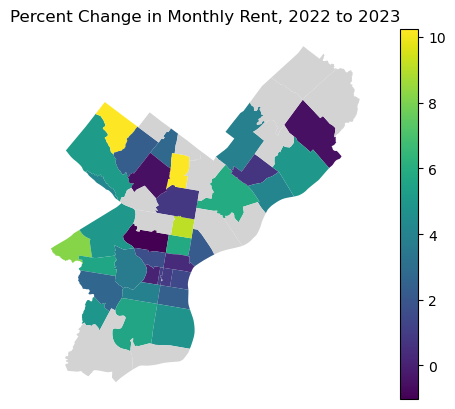

In [272]:
ax = phl_zips_rentals.plot(column='Percent Change 2022 to 2023', legend=True, missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()
ax.set_title('Percent Change in Monthly Rent, 2022 to 2023')
plt.show()

In [273]:
# Sort home values data by zip code to make it easier adding percent change to geopandas dataframe
phl_homevalues_sorted = phl_zillow_homevalues.sort_values(by="Zip Code")
phl_homevalues_sorted.head()

,Zip Code,6/30/2015,6/30/2023,Percent Change 2015 to 2023
12796,19102,343783.84480,350159.3781,1.854518
4608,19103,428469.14480,495322.2664,15.602786
863,19104,90076.52706,215241.1171,138.953614
8409,19106,315786.72120,416606.2029,31.926447
7381,19107,217079.60310,313022.8957,44.197286


In [274]:
# Manually add column with percent changes from phl_zillow_homevalues
phl_zips_sorted = phl_zips.sort_values(by="CODE")
phl_zips_homevalues = phl_zips_sorted
phl_zips_homevalues["Percent Change 2015 to 2023"]=[1.85, 15.60, 138.95, 31.93, 44.20, None, 88.77, None, 64.14, 64.49, 67.44,
                                                   61.74, 63.94, 107.80, 326.55, 114.01, 45.63, 117.44, 74.78, 75.51, 46.81,
                                                   53.46, 63.81, 34.34, 108.83, 338.66, 274.61, 133.42, 93.95, 84.89, 77.11,
                                                   109.10, 231.72, 248.54, 90.05, 153.68, 186.87, 118.65, 94.36, 66.55, 41.88,
                                                   67.28, 89.21, 66.50, 80.22, 73.56, 80.57, 57.62]
phl_zips_homevalues.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023,Percent Change 2015 to 2023
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",1.05,1.85
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",0.05,15.60
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",3.65,138.95
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",1.42,31.93
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",0.92,44.20


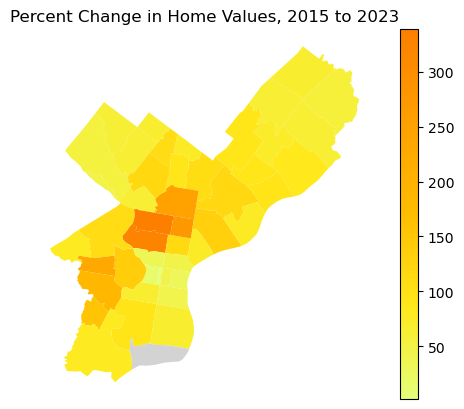

In [275]:
ax = phl_zips_homevalues.plot(column='Percent Change 2015 to 2023', legend=True, missing_kwds={'color': 'lightgrey'}, cmap='Wistia')
ax.set_axis_off()
ax.set_title('Percent Change in Home Values, 2015 to 2023')
plt.show()

In [276]:
# Files to Load
tax_data_to_load = Path("Resources/taxes/tax_delinquencies_philadelphia.csv")

# Read tax delinquencies file and store into Pandas DataFrames, and look at only cases with >$100 due
tax_delinquencies = pd.read_csv(tax_data_to_load)
tax_delinquencies_over100 = tax_delinquencies[tax_delinquencies['total_due']>100]

# Count number of cases per zip code
td_by_zip = tax_delinquencies_over100['zip_code'].value_counts()

In [277]:
tax_delinquencies_over100

,zip_code,zip_4,unit_type,unit_num,owner,co_owner,principal_due,penalty_due,interest_due,other_charges_due,total_due,is_actionable,payment_agreement,num_years_owed,most_recent_year_owed,oldest_year_owed
0,19102.0,4223.0,NaN,NaN,ACADEMY OF MUSIC OF PHILA INC,ACADEMY OF MUSIC OF PHILA INC,361147.54,24501.46,77797.86,28467.89,491914.75,True,False,6,2021,2015
1,19118.0,3246.0,NaN,NaN,CHESTNUT HILL,CHESTNUT HILL,68708.49,4809.60,28235.68,6759.84,108513.61,True,False,5,2019,2015
2,19130.0,3805.0,NaN,NaN,MORRIS LOUISE,MORRIS LOUISE,76914.74,6151.00,15960.40,7306.06,106332.20,True,False,6,2021,2015
3,19134.0,6106.0,NaN,NaN,3000 E TIOGA ST LLC,3000 E TIOGA ST LLC,64704.79,4395.17,15848.35,16711.42,101659.73,True,False,7,2021,2015
4,19111.0,5242.0,NaN,NaN,GENESIS BAPTIST CHURCH,GENESIS BAPTIST CHURCH,64699.35,4906.39,18989.10,7081.19,95676.03,True,False,7,2021,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31498,19126.0,2743.0,NaN,NaN,SHARPE ALICE R,SHARPE ALICE R,0.00,1.20,1.80,97.12,100.12,True,False,1,2021,2021
31499,19144.0,3339.0,NaN,NaN,JACKSON WHITNYE SHARL,JACKSON WHITNYE SHARL,4.69,0.28,2.90,92.24,100.11,True,False,1,2021,2021
31500,19143.0,3104.0,NaN,NaN,LINDSEY ELIZABETH R,LINDSEY ELIZABETH R,0.00,1.19,1.80,97.11,100.10,True,False,1,2021,2021
31501,19120.0,3915.0,NaN,NaN,MUSTAFA KARIMEH F,MUSTAFA KARIMEH F,0.00,0.00,7.30,92.76,100.06,True,False,1,2021,2021


In [278]:
# Prepare tax delinquency data for merging with home values data
td_df = pd.DataFrame(td_by_zip).reset_index()
td_df = td_df.rename(columns={'index':'zip', 'zip_code':'tax_delinquencies'})

# This drops a "1.0" and "19192.0" zip code which are not valid
td_df = td_df.drop([46,49])
td_df.head()

,zip,tax_delinquencies
0,19132.0,2401
1,19140.0,2389
2,19143.0,2103
3,19134.0,1917
4,19139.0,1555


In [279]:
# Prepare home values data to merge with tax delinquencies data
hv_df = phl_zillow_homevalues.rename(columns={'Zip Code':'zip'})
hv_df.head()

,zip,6/30/2015,6/30/2023,Percent Change 2015 to 2023
106,19120,75591.89726,157079.9906,107.800037
160,19124,71630.14476,155755.5130,117.444085
211,19111,148119.32580,279611.3808,88.774408
265,19143,44579.97191,127886.7503,186.870415
358,19149,116612.82470,220640.6397,89.207868


In [280]:
# Merge home values and tax delinquencies data
hv_td = pd.merge(td_df, hv_df, how="outer", on="zip")

# Remove 19112 and 19108 because they are missing data
hv_td_clean = hv_td.drop([46,47])
hv_td_clean.head()

,zip,tax_delinquencies,6/30/2015,6/30/2023,Percent Change 2015 to 2023
0,19132.0,2401,15734.31781,69020.88960,338.664646
1,19140.0,2389,23212.54237,80905.38434,248.541677
2,19143.0,2103,44579.97191,127886.75030,186.870415
3,19134.0,1917,43753.06559,102127.55170,133.418048
4,19139.0,1555,35326.89080,117185.50580,231.717576


In [281]:
# Define a function to create Linear Regression plots
def regression_line(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values,regress_values,color="red")
    print(f"The equation of the regression line is {line_eq}")
    print(f"The r-squared is: {rvalue**2}")

The equation of the regression line is y = 6.98x + -61.51
The r-squared is: 0.6876287034216779
-------------------------------------
The correlation between both factors is 0.83
The p-value of Pearson's r correlation coefficient is 1.0905397617108628e-12


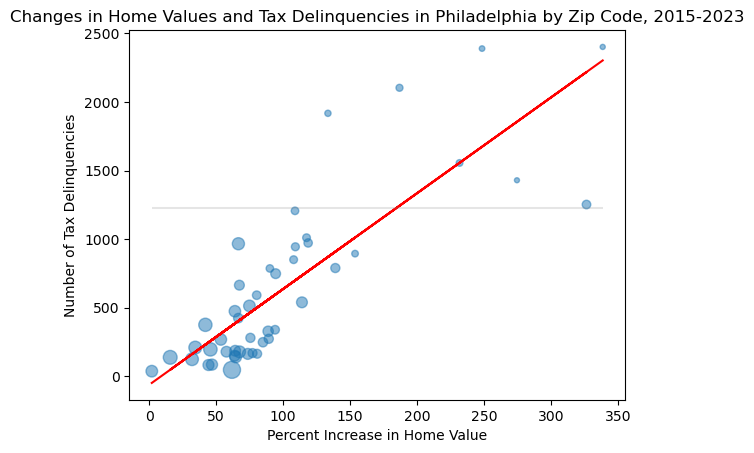

In [282]:
# Scatter plot of % change in home values vs. tax delinquencies
x_values = hv_td_clean["Percent Change 2015 to 2023"]
y_values = hv_td_clean["tax_delinquencies"]
homevalue_2023 = hv_td_clean["6/30/2023"]/5000

plt.scatter(x_values, y_values,s=homevalue_2023, alpha=0.5)
plt.xlabel("Percent Increase in Home Value")
plt.ylabel("Number of Tax Delinquencies")
plt.title("Changes in Home Values and Tax Delinquencies in Philadelphia by Zip Code, 2015-2023")

# Add regression line using defined function
regression_line(x_values, y_values)

print('-------------------------------------')

# Calculate Pearson's r for the scatter plot
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The p-value of Pearson's r correlation coefficient is {correlation[1]}")

# Add horizontal reference line at 1225 tax delinquencies
xmin=min(x_values)
xmax=max(x_values)
plt.hlines(1225, xmin, xmax, colors="gray", alpha=0.2)
           
plt.show()

In [283]:
priority_zips_df = hv_td_clean[hv_td_clean['tax_delinquencies']>1225]
priority_zips_df

,zip,tax_delinquencies,6/30/2015,6/30/2023,Percent Change 2015 to 2023
0,19132.0,2401,15734.31781,69020.88960,338.664646
1,19140.0,2389,23212.54237,80905.38434,248.541677
2,19143.0,2103,44579.97191,127886.75030,186.870415
3,19134.0,1917,43753.06559,102127.55170,133.418048
4,19139.0,1555,35326.89080,117185.50580,231.717576
5,19133.0,1429,17772.53125,66578.04336,274.612048
6,19121.0,1252,44643.06884,190426.19390,326.552652


In [284]:
# Convert zipcodes to integers to remove the trailing zero
priority_zips = priority_zips_df['zip'].astype(int)

# Make a list of the priority zips to print out
priority_zips_list = [zipcode for zipcode in priority_zips]
print('TO MITIGATE RISK OF DISPLACEMENT ASSOCIATED WITH GENTRIFICATION...')
print('The following zip codes should be prioritized:')
print(f'{priority_zips_list}')

TO MITIGATE RISK OF DISPLACEMENT ASSOCIATED WITH GENTRIFICATION...
The following zip codes should be prioritized:
[19132, 19140, 19143, 19134, 19139, 19133, 19121]


In [285]:
# Manually add priority status (true/false)
phl_zips_homevalues["Priority Zip"] = [False, False, False, False, False, False, False, False, False, False, False,
                                       False, False, False, True, False, False, False, False, False, False,
                                       False, False, False, False, True, True, True, False, False, False,
                                       False, True, True, False, False, True, False, False, False, False,
                                       False, False, False, False, False, False, False]
phl_zips_homevalues

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023,Percent Change 2015 to 2023,Priority Zip
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",1.05,1.85,False
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",0.05,15.60,False
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",3.65,138.95,False
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",1.42,31.93,False
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",0.92,44.20,False
14,15,19109,9,9.469785e+04,1248.210416,"POLYGON ((-75.16403 39.95008, -75.16343 39.950...",NaN,NaN,False
15,16,19111,11,1.458023e+08,68750.201529,"POLYGON ((-75.05538 40.07679, -75.05553 40.076...",3.82,88.77,False
16,17,19112,12,8.886162e+07,48233.604282,"POLYGON ((-75.19244 39.89761, -75.19194 39.896...",NaN,NaN,False
17,18,19114,14,1.586637e+08,58745.716719,"POLYGON ((-74.99876 40.08133, -74.99724 40.080...",-0.55,64.14,False
18,19,19115,15,1.305048e+08,58802.804113,"POLYGON ((-75.03779 40.10688, -75.03716 40.106...",NaN,64.49,False


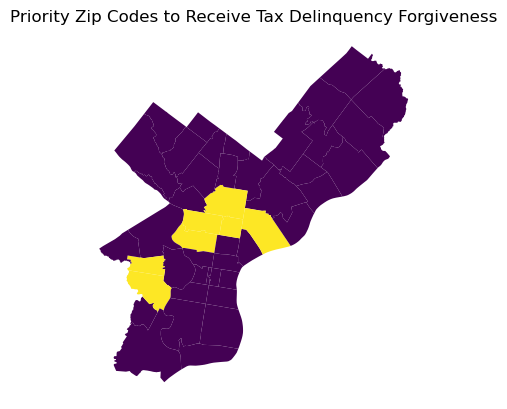

In [286]:
# Map the priority zip codes
ax = phl_zips_homevalues.plot(column='Priority Zip', legend=False, missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()
ax.set_title('Priority Zip Codes to Receive Tax Delinquency Forgiveness')
plt.show()